<a href="https://colab.research.google.com/github/GallardoCarmen/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P4Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4**

 Carmen Gallardo, Marta Herraiz y Pablo Mendieta


 Primero vamos a instalar todas las librerías necesarias para el algoritmo genético y definimos la función que se va a utilizar para mostar los resultados gráficamente.

In [ ]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import random
from deap import base
from deap import creator
from deap import tools

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    # Información sobre el número de generaciones
    gen = log.select("gen")
    # Mínimos, máximos y media de la función de aptitud en cada generación
    fit_mins = np.array(log.select("min"))
    fit_maxs = np.array(log.select("max"))
    fit_ave = np.array(log.select("avg"))

    # Asegurar que todas las listas tengan la misma longitud
    min_len = min(len(gen), len(fit_mins), len(fit_maxs), len(fit_ave))
    gen = gen[:min_len]
    fit_mins = fit_mins[:min_len]
    fit_maxs = fit_maxs[:min_len]
    fit_ave = fit_ave[:min_len]

    # Representación de los valores anteriores
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha=0.2)

    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi=300)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78113 sha256=841de74d885f1edaa38eb3daf1d7ad7221c906276dbe4fd109ebf4925126db1f
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


# **EJERCICIO 1**

Encontrar los máximos de la función :

$ z = f(x,y) = 3(1-x^2)e^{-(x^2) - (y+1)^2} - 10(x/5 - x^3 - y^5)e^{-x^2 - y^2} - 1/3e^{-(x+1)^2 - y^2} $


en el dominio :

  $ (x, y) \in [-100, 100]  $

## Representación gráfica

In [ ]:
# Fijamos la semilla
np.random.seed(0)
# Generamos los números pseudo-aleatorios
# Son los mismos mientras no cambiemos la semilla

# Numpy genera directamente los vectores
z = np.random.uniform(-100, 100, 10).reshape(1, 10)
t = np.random.uniform(-100, 100, 10).reshape(1, 10)
print('z= ', z)
print('t= ', t)

z=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
t=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


In [ ]:
# Definimos la función objetivo
def funcion_objetivo(ind):
    x, y = ind
    if x > 100 or x < -100 or y > 100 or y < -100:
        return -1,
    res = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2) - 10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - 1/3 * np.exp(-(x + 1)**2 - y**2)
    return res,

In [ ]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

In [ ]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_objetivo(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

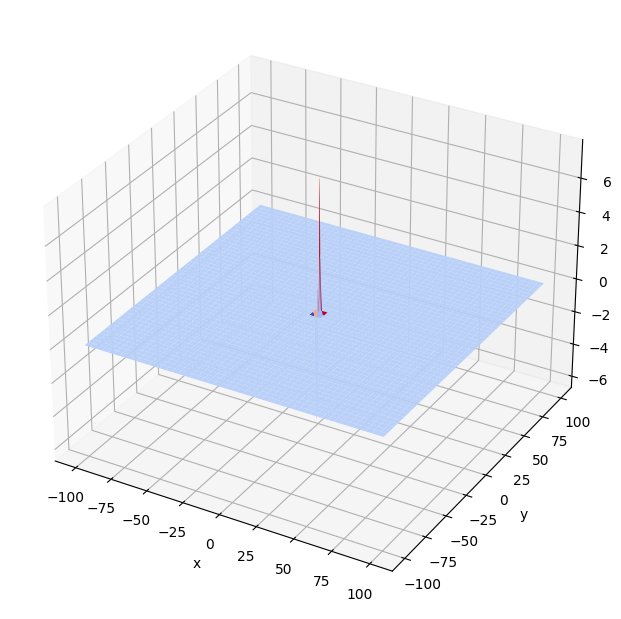

In [ ]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Text(0.5, 0, 'f(x,y)')

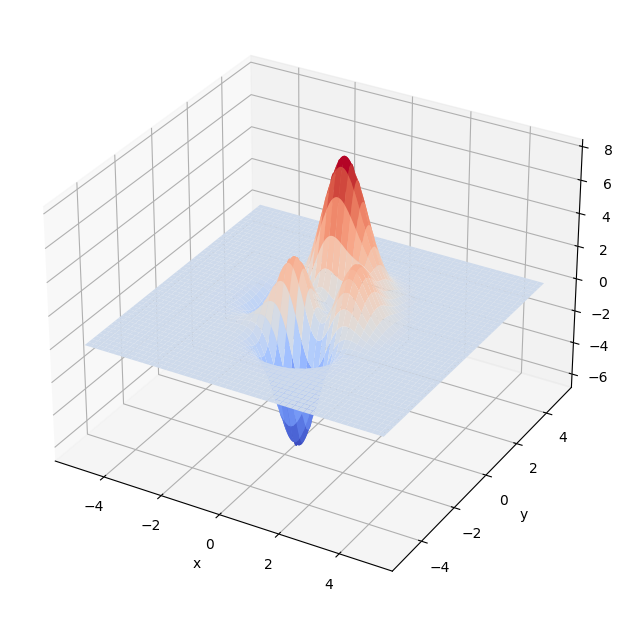

In [ ]:
# Generamos vectores nuevos
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

# Evaluamos todos los nuevos valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_objetivo(val) for val in vals],(1000, 1000))

# Mostramos el resultado
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")


## Algoritmo genetico

In [ ]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, -5, 5)
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

1.050110908512667

In [ ]:
# Generación de inviduos y población
# Cada individuo tendrá dos genes, ya que la función "attr_uniform" se repetirá dos veces

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo


[2.6203996271895145, 0.0969369240581468]

**Definimos el tamaño de la población**

La población tendrá 128 individuos, ya que se necesitan 64 bits para la representación de la solución. Nos basamos en la fórmula de: tamaño población está entre [l, 2l], en nuestro caso entre [64, 128]. Por ello seleccionamos 128, el mayor tamaño que puede alcanzar la población.

In [ ]:
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 128)

In [ ]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)
len(poblacion)

[[1.1381599106771638, -3.130021112977721], [-2.77606253572955, -0.4372412665051133], [-3.634209342445882, 1.816236261914809], [-0.10192424194679273, -0.113454242488368], [-2.5495004106343346, -1.8628978942561778], [-4.943888759957176, 0.9662893042161835], [4.724798409630676, -3.3777195999707663], [-1.8007213214888185, -4.142742161426902], [-3.057176851211442, -0.8384223897635863], [3.121968707224047, -0.8258761440924935], [-3.5596254519708657, 4.483126045969799], [4.526749564650338, 1.2380627448684738], [4.654506122779445, -2.423226685556905], [4.889811304049482, 2.5525970300425165], [-4.663449356852252, 0.3801774172864416], [-0.6730455897649428, 1.664039665165391], [4.5307857986691875, 3.2677242548625127], [1.375819757940155, -0.10572932206758345], [0.5152291825722006, 0.8610589799822446], [-2.3537660378579806, -1.599083449910621], [-4.87542338743873, -1.4142901944919428], [0.1998652489590924, -2.6750384153511297], [-4.685357370991886, 1.738969734986556], [-4.621882727554202, 0.250159

128

In [ ]:
# Registro de operaciones genéticas
# Calcula el valor de aptitud de un individuo.
toolbox.register("evaluate", funcion_objetivo)
# Apareamiento = mate, realiza un cruce de un punto entre dos individuos
toolbox.register("mate", tools.cxOnePoint)
# Añade un valor de una distribución gaussiana a cada gen del individuo, guarda la media, la desviación y la probabilidad de mutación
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
# Varios individuos compiten entre sí y se selecciona el mejor de ellos. El parámetro 'tournsize' controla el tamaño del torneo
toolbox.register("select", tools.selTournament, tournsize=3)


 **Alogritmo Genético**


*   Probabilidad de Cruce = 0.5
*   Probabilidad de Mutación = 0.2
*   Número de Generaciones = 20



In [ ]:
def mainF1():

    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(8)

    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones

    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.7, 0.3, 35

    # Generamos la Población Inicial
    pop = toolbox.population()

    # Definimos el objeto hof que almacenará el mejor individuo
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(1)

    # Definimos un objeto para generar las estadísticas de la
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)

    # Registramos en el objeto stats las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()

    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook

In [ ]:
best, log = mainF1()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])


gen	nevals	avg     	std    	min     	max    
0  	128   	0.296062	1.15633	-2.18389	7.98912
1  	97    	0.362305	1.90213	-4.61996	8.02036
2  	102   	1.08059 	2.52274	-5.8084 	8.09243
3  	110   	1.94611 	2.35232	-4.47717	8.03942
4  	87    	3.55239 	2.36208	-0.529912	8.03942
5  	108   	5.65766 	2.17234	1.41763e-46	8.09243
6  	99    	6.7802  	1.90734	-0.110745  	8.09243
7  	110   	7.56153 	1.61561	-1.57273   	8.09243
8  	104   	7.53968 	1.91956	4.0062e-53 	8.09243
9  	89    	7.71214 	1.69018	-4.8466e-07	8.09243
10 	97    	7.71249 	1.7119 	-0.041184  	8.09243
11 	103   	7.73646 	1.61709	3.3985e-31 	8.09243
12 	104   	7.56107 	1.95444	-2.00493e-25	8.09243
13 	97    	7.57879 	1.95675	-0.000912631	8.09243
14 	102   	7.80118 	1.462  	-8.71066e-07	8.09243
15 	90    	7.72279 	1.66971	-0.00380382 	8.09243
16 	100   	7.72097 	1.6767 	-0.000814131	8.09243
17 	100   	7.75222 	1.5709 	-0.140342   	8.09243
18 	106   	7.97575 	0.907876	4.89456e-15 	8.09243
19 	98    	7.76764 	1.71198 	-5.48439    	8.09243

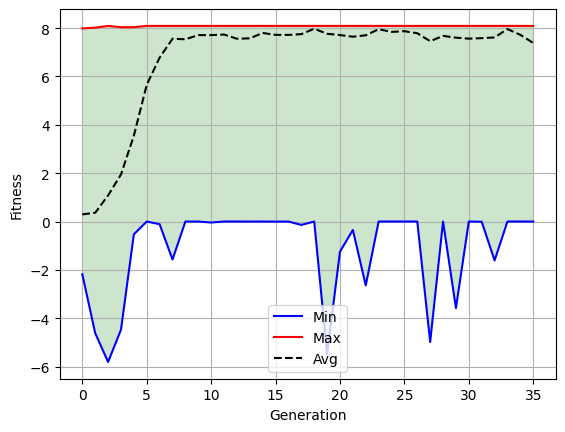

In [ ]:
plot_evolucion(log)

Según la gráfica que se ha mostrado, podemos ver que se llega muy rápido al máximo, es prácticamente una recta, se representa con la línea roja. Por otro lado la media, converge rápido también hacia el máximo, pero no es igual de rápida que el máximo. Esta representa mejor como mejora el algoritmo, va expotando los máximos que interesan, mientras siga habiendo mínimos.

En cuanto al mínimo, que es lo que estamos buscando en este problema, se alcanza muy al principio pero continua buscando para ver si hay alguno más pequeño que el primero que se encuentra.

La zona verde representa la cantidad de exploración que se está dando durante el algoritmo. Esta exploración la vamos a explicar más profundamente más adelante, cuando usamos dos puntos de cruce en vez de uno.

#**EJERICIO 2:**
Dada la función de Rastring con A = 10 y x_i perteneciente a (-5.12, 5.12).
Implementarla y minimizarla para n = 10:












## Representación gráfica

In [ ]:
# Definimos la función para A = 10
def rastrigin_function(individual):
    A = 10
    n = len(individual)
    return A * n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),


In [ ]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-5.12, 5.12, 1000)
y = np.linspace(-5.12, 5.12, 1000)


In [ ]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([rastrigin_function(val) for val in vals],(1000, 1000))


Text(0.5, 0, 'f(x,y)')

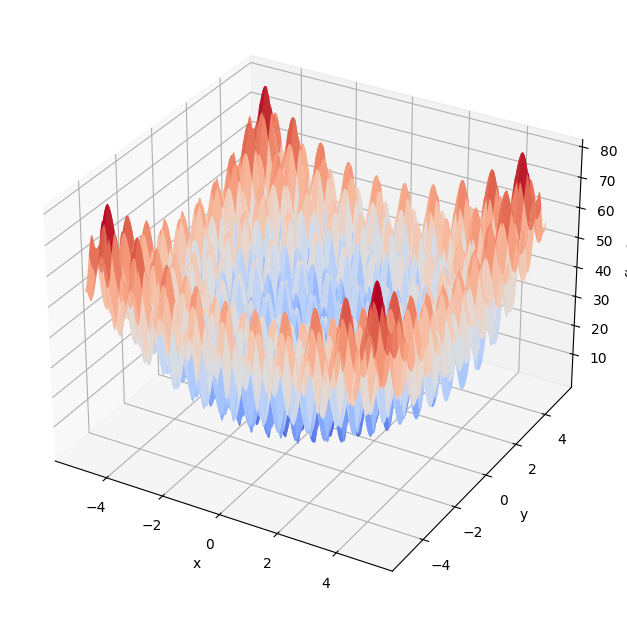

In [ ]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

## Algortimo genetico

In [ ]:
 # Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox2 = base.Toolbox()

# Generación de genes en el rango deseado
toolbox2.register("attr_float", random.uniform, -5.12, 5.12)
# Probamos y vemos que generamos un número leatorio entre -5.12 y 5.12 distinto cada vez
toolbox2.attr_float()

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-2.082684547748627

In [ ]:
# Generación de inviduos y población
# Cada individuo tendrá 10 genes, para ello, la función "attr_float" se repetirá diez veces
# Esto se debe a que estamos trabajando en 10D. Luego, necesitamos 10 variables y n = 10
toolbox2.register("individual", tools.initRepeat, creator.Individual,
                 toolbox2.attr_float, n = 10)

# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox2.individual()
individuo

[-0.5620704657561921,
 2.339581316633689,
 4.738803107559439,
 -4.189352738506005,
 0.9593354090646145,
 -1.9888639508609525,
 -2.6147123206069307,
 2.2008020257938403,
 -2.4075652392770897,
 -2.0748359150727036]

**Definimos el tamaño de la población:**

Comenzamos probando con una población de 640 individuos, ya que al igual que antes, nos basamos en [l, 2l]. Para la solución de este problema hacen falta 64 bits * 10 (trabajamos en 10D), luego podemos usar una población entre 640 y 1280 individuos.
Esto es porque, como hemos comentado antes, cada individuo tendrá 10 genes, luego se multiplica por 10.



In [ ]:
# Comenzamos probando con una población de 640 individuos, aunque se puede aumentar
# o disminuir para mejorar el rendimiento de la función
toolbox2.register("population", tools.initRepeat, list,
                 toolbox2.individual, 640)

# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox2.population()
print(poblacion)

[[-2.061518654267558, -1.516556516899028, -2.8128114633241954, 1.6519186952445466, 0.502988650488124, -1.992253710131446, -1.3099174591408054, 3.4430563463773494, 1.8898689811219587, 1.9198400556176622], [-0.1944937382319143, -3.2876014484523095, -0.7587880343289148, 4.807787069861747, -3.8847094370156423, -1.7335797984722081, -4.4048901632362725, -4.603085011178613, -2.866295077842261, 4.649767200717412], [-4.904109398360548, 3.328657886126776, 2.153747004560648, 1.9522496024460931, -3.158584815425912, -0.6411129389347456, -1.308415713553285, 2.8652630468506457, -0.7281499864419985, 0.039484959702724254], [-4.855826353318683, 5.031281675118884, 1.9318994002717087, -3.6774260243162873, 3.3289880720935523, 0.9757551692220128, 3.0212291995704144, -0.44108841197922644, -2.957364021807848, -1.3057546100974902], [0.3570157946767676, -5.011339245979734, 3.8106342544886145, -4.80397000785444, -2.0140234079545087, -4.9500607089656015, 1.4962991741125817, -0.4944776215578086, -4.687265897050406

In [ ]:
# Registro de operaciones genéticas
# Calcula el valor de aptitud de un individuo.
toolbox2.register("evaluate", rastrigin_function)
# Apareamiento = mate, realiza un cruce de un punto entre dos individuos
toolbox2.register("mate", tools.cxOnePoint)
# Añade un valor de una distribución gaussiana a cada gen del individuo, guarda la media, la desviación y la probabilidad de mutación
toolbox2.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 3, indpb=0.1)
# Varios individuos compiten entre sí y se selecciona el mejor de ellos. El parámetro 'tournsize' controla el tamaño del torneo
toolbox2.register("select", tools.selTournament, tournsize=5)


Comenzamos el algoritmo genético

In [ ]:
def mainF2():
    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(30)

    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.7, 0.3, 70
    #Generamos la Población Inicial
    pop = toolbox2.population()

    # Definimos el objeto hof que almacenará el mejor individuo
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(1)

    # Definimos un objeto para generar las estadísticas de la
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)

    # Registramos en el objeto stats
    # las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()

    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    generacion_actual = 0
    max_generaciones = 100
    num_generaciones_convergencia = 0
    tolerancia_convergencia = 1e6
    poblacion_anterior = None
    diferencia_mejor_fitness = 0

    pop, logbook = algorithms.eaSimple(pop, toolbox2, cxpb=CXPB,
                                        mutpb=MUTPB, ngen=NGEN, stats=stats,
                                        halloffame=hof, verbose=True)

    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook


In [ ]:
best, log = mainF2()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])

gen	nevals	avg    	std    	min    	max   
0  	640   	184.051	33.0483	92.3763	281.18
1  	501   	149.094	27.1882	88.7934	246.93
2  	527   	121.913	22.6091	60.4923	240.226
3  	511   	102.033	21.5118	52.2914	237.236
4  	519   	83.498 	18.5703	41.425 	187.791
5  	520   	69.9364	19.7154	33.2341	203.43 
6  	512   	56.7225	17.7356	26.0015	204.835
7  	505   	48.9526	17.6739	24.385 	185.539
8  	512   	42.4182	16.8589	20.0357	140.356
9  	511   	35.5216	15.2873	13.1694	146.32 
10 	524   	29.434 	12.9707	12.5914	120.748
11 	504   	26.2687	15.6879	10.4945	162.01 
12 	495   	23.0087	16.348 	8.16864	152.384
13 	518   	19.1543	14.3729	8.01891	128.146
14 	515   	17.1023	15.1137	6.94193	108.073
15 	518   	16.0678	16.4178	6.19677	149.828
16 	513   	13.2502	12.6928	6.19677	102.985
17 	514   	13.9667	15.9647	5.77295	140.644
18 	520   	11.4037	13.3521	5.25736	155.88 
19 	512   	11.2885	13.3191	5.25736	106.239
20 	535   	11.941 	15.4664	4.27017	114.009
21 	482   	11.2099	15.3204	4.27017	126.324
22 	517   	11.

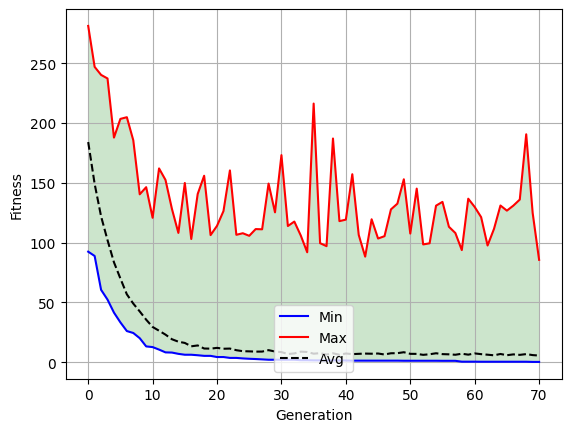

In [ ]:
plot_evolucion(log)

#DOS PUNTOS DE CRUCE

**Probamos con dos puntos de cruce en cada ejercicio**

**Ejercicio 1:**

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std    	min     	max    
0  	128   	0.296062	1.15633	-2.18389	7.98912
1  	92    	0.573478	2.03032	-5.65176	8.02036
2  	104   	1.32919 	2.58322	-3.87435	8.08533
3  	99    	2.40817 	2.66533	-3.84413	8.08533
4  	91    	4.44061 	2.62204	-0.387484	8.08533
5  	106   	6.08257 	2.24895	-3.09037 	8.09243
6  	104   	7.22672 	2.02502	-5.9058  	8.09243
7  	102   	7.75979 	1.47724	-3.93819 	8.09243
8  	86    	7.87638 	1.21446	1.81339e-34	8.09243
9  	97    	7.85171 	1.29541	1.29168e-13	8.09243
10 	101   	7.69189 	1.71659	-0.000114054	8.09243
11 	102   	7.68107 	1.80771	-2.22785    	8.09243
12 	96    	7.79582 	1.4445 	-0.137216   	8.09243
13 	99    	7.69486 	1.71699	-1.12401e-05	8.09429
14 	99    	7.72068 	1.67794	-3.99182e-06	8.09429
15 	96    	7.84415 	1.384  	2.0057e-06  	8.09429
16 	83    	7.78708 	1.52008	1.88767e-19 	8.09429
17 	106   	7.82167 	1.52539	-2.42736    	8.09429
18 	98    	7.71983 	1.70867	-1.79491    	8.09429
19 	91    	7.57426 	1.93642	-1.99403e-09	8.09429
20 	9

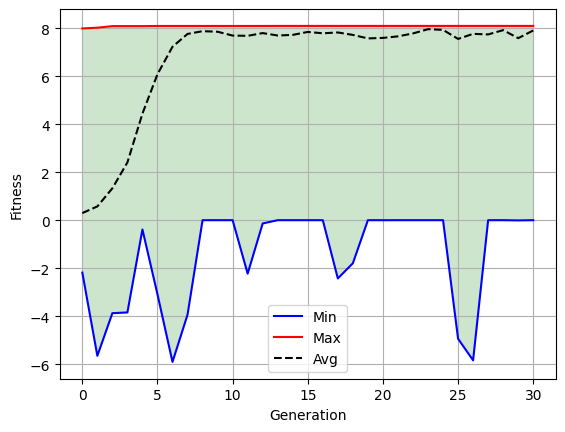

In [ ]:

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, -5, 5)
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()
def funcion_objetivo(ind):
    """
    Función objetivo de nuestro problema
    """
    x, y = ind
    if x > 100 or x < -100 or y > 100 or y < -100:
        return -1,
    res = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2) - 10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - 1/3 * np.exp(-(x + 1)**2 - y**2)
    return res,

# Generación de inviduos y población
# Cada individuo tendrá dos genes, ya que la función "attr_uniform" se repetirá dos veces

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

# La población tendrá 50 individuos, ya que el último argumento es 50
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 128)

# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

# Registro de operaciones genéticas
# Calcula el valor de aptitud de un individuo.
toolbox.register("evaluate", funcion_objetivo)
# Apareamiento = mate, realiza un cruce de un punto entre dos individuos
toolbox.register("mate", tools.cxTwoPoint)
# Añade un valor de una distribución gaussiana a cada gen del individuo, guarda la media, la desviación y la probabilidad de mutación
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
# Varios individuos compiten entre sí y se selecciona el mejor de ellos. El parámetro 'tournsize' controla el tamaño del torneo
toolbox.register("select", tools.selTournament, tournsize=3)

def mainF12():

    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(8)

    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones

    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.7, 0.2, 30

    # Generamos la Población Inicial
    pop = toolbox.population()

    # Definimos el objeto hof que almacenará el mejor individuo
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(12)

    # Definimos un objeto para generar las estadísticas de la
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)

    # Registramos en el objeto stats las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()

    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook


best, log = mainF12()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])


plot_evolucion(log)


**Ejercicio 2:**



[[-2.326470874982004, -4.633527836143349], [1.8574614879623388, -2.7000941604127524], [3.0189804589761486, -0.4309067223389569], [-4.172743995945426, -2.714683487816015], [-3.912139226590835, 2.517137963137058], [-2.7702163949527705, -0.8014245891959284], [1.302434284416969, -4.781023608297676], [-3.0848495414413177, -3.1878383883600723], [2.2243771508880874, 3.75908048507916], [1.360781440429653, 0.20557647854967165], [-1.9906307678464294, 0.25259004169858557], [-4.64966364876881, -2.792273435880437], [-2.2551632180971373, -0.3495082216370591], [-1.5648468923298031, 2.6096121937805927], [0.9828559910292425, -2.411868827460765], [3.3807021521134395, 1.726160205816262], [-0.637045842228261, 0.9470081205945311], [-1.2716893710649924, 0.8025074146244879], [3.325412578266601, 2.9835927438393988], [-1.2861597740561392, 1.0819833943441513], [-1.3349197814617106, 1.078488146934382], [-1.0807484712893989, 2.0737695747934293], [-0.656177183139163, 4.551121537842587], [-0.21713009338723133, -2.8

68 	495   	6.73809	16.9964	0.331778	190.552
69 	514   	5.89551	15.8976	0.188968	124.766
70 	522   	5.52567	13.3283	0.188968	85.5641
Mejor fitness: 0.188968
Mejor individuo [-0.019033001872219, 0.014603874099514691, -0.003616799315303787, 0.0075722857409116495, -0.00531350366289979, -0.010170191075994595, -0.0011426265819177474, -0.010135679988953032, 0.008275098663702206, 0.0017453768875470514]


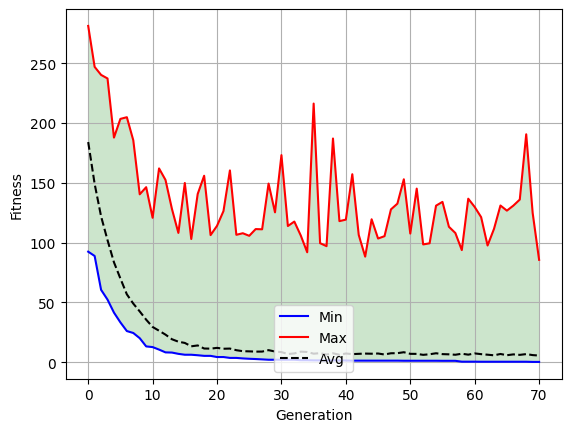

In [ ]:
# Crear una caja de herramientas
toolbox = base.Toolbox()

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, -5, 5)
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

# Generación de inviduos y población
# Cada individuo tendrá dos genes, ya que la función "attr_uniform" se repetirá dos veces

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

# La población tendrá 50 individuos, ya que el último argumento es 50
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 640)

# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)
len(poblacion)


# Registro de operaciones genéticas
# Calcula el valor de aptitud de un individuo.
toolbox2.register("evaluate", rastrigin_function)
# Apareamiento = mate, realiza un cruce de un punto entre dos individuos
toolbox.register("mate", tools.cxTwoPoint)
# Añade un valor de una distribución gaussiana a cada gen del individuo, guarda la media, la desviación y la probabilidad de mutación
toolbox2.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 3, indpb=0.1)
# Varios individuos compiten entre sí y se selecciona el mejor de ellos. El parámetro 'tournsize' controla el tamaño del torneo
toolbox2.register("select", tools.selTournament, tournsize=5)

def mainF22():
    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(30)

    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.7, 0.3, 70
    #Generamos la Población Inicial
    pop = toolbox2.population()

    # Definimos el objeto hof que almacenará el mejor individuo
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(1)

    # Definimos un objeto para generar las estadísticas de la
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)

    # Registramos en el objeto stats
    # las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()

    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    generacion_actual = 0
    max_generaciones = 100
    num_generaciones_convergencia = 0
    tolerancia_convergencia = 1e6
    poblacion_anterior = None
    diferencia_mejor_fitness = 0

    pop, logbook = algorithms.eaSimple(pop, toolbox2, cxpb=CXPB,
                                        mutpb=MUTPB, ngen=NGEN, stats=stats,
                                        halloffame=hof, verbose=True)

    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook

best, log = mainF22()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])


plot_evolucion(log)

